In this file, we have a closer look at the data. The imports are below.

In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
with open('preprocessed_data.json', 'r') as f:
    lemmatized = json.load(f)
    
with open('mortaldict.json', 'r') as f:
    mortaldict = json.load(f)
    
with open('goddict.json', 'r') as f:
    goddict = json.load(f)

First, we go through the texts, and count how many times a certain name is mentioned.

In [3]:
for idx, wordtag in enumerate(lemmatized):
    word = wordtag[0]
    tag = wordtag[1]

    if tag == 'NNP':
        
        # Binary to indicate if the word has been found
        filled_in = 0
        
        # Go through mortaldict
        for idx1, vals in enumerate(mortaldict.values()):
            if word in vals[0]:
                filled_in = 1
                mortaldict[str(idx1)][1] += 1
                lemmatized[idx][1] = 'NNPm'
                break
                
        # If word hasn't been found in mortaldict, go through goddict
        if filled_in == 0:
            for idx2, vals in enumerate(goddict.values()):
                if word in vals[0]:
                    filled_in = 1
                    goddict[str(idx2)][1] += 1
                    lemmatized[idx][1] = 'NNPg'
                    break

Below we print the amounts of times mortals and gods are mentioned. Note that in reality this number is a bit higher because we are not looking at all mortals and all gods. While mortals are named more often, both gods and mortals are named enough times to be able to do a meaningful analysis.

In [4]:
summortals = 0
sumgods = 0

for mval in mortaldict.values():
    summortals += mval[1]
    
for gval in goddict.values():
    sumgods += gval[1]
    
print('Total amount of mortal names: ', summortals)
print('Total amount of god names: ', sumgods)

Total amount of mortal names:  8021
Total amount of god names:  3125


Next, we plot the 20 most common names for both mortals and gods. 

In [5]:
# Reference for sorting dict: https://www.geeksforgeeks.org/python-sort-list-according-second-element-sublist/

sortm = list(mortaldict.values())
sortm.sort(key = lambda x: x[1])
sortm.reverse()

sortg = list(goddict.values())
sortg.sort(key = lambda x: x[1])
sortg.reverse()

In [6]:
mnames = [name[0][0] for name in sortm]
mcounts = [count[1] for count in sortm]

gnames = [name[0][0] for name in sortg]
gcounts = [count[1] for count in sortg]

As can be seen in the graphs, the most common names make sense considering the original texts. The main characters of for example the Iliad and Odyssee occur most often, and the most important gods are named the most.

Text(0.5, 1.0, '20 most common mortals and their frequencies')

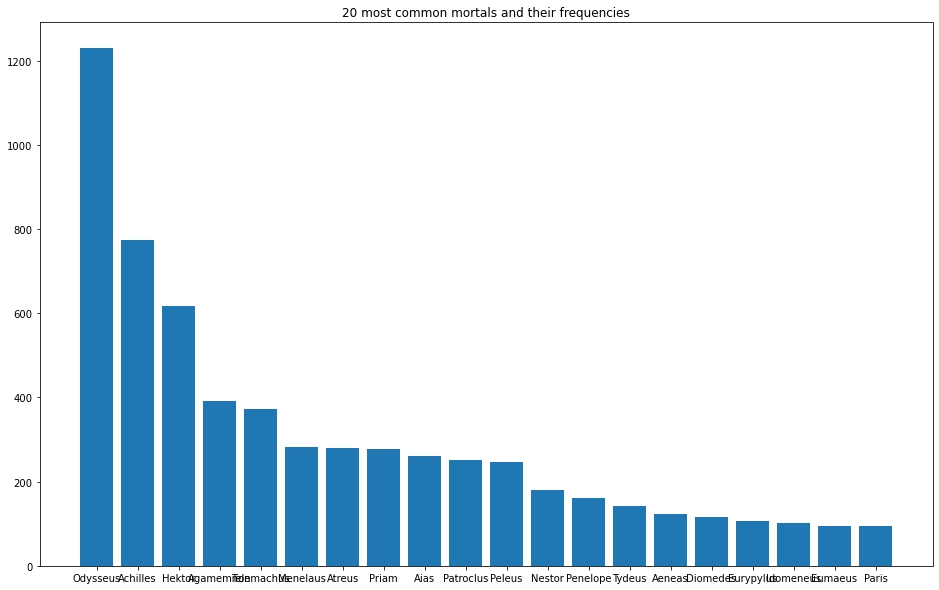

In [28]:
plt.figure(figsize=(16, 10))
plt.bar(mnames[0:20], mcounts[0:20])
plt.title('20 most common mortals and their frequencies')

Text(0.5, 1.0, '20 most common gods and their frequencies')

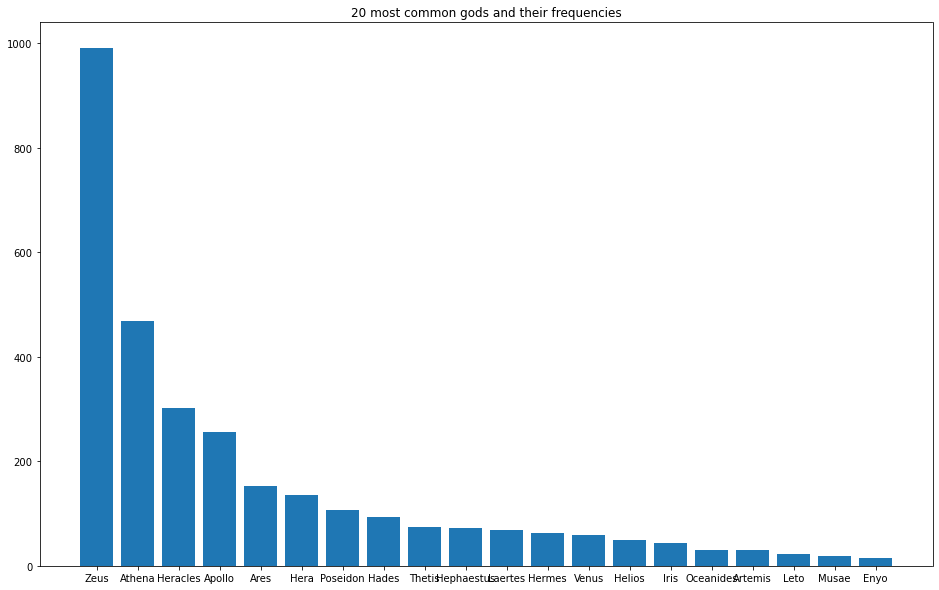

In [27]:
plt.figure(figsize=(16, 10))
plt.bar(gnames[0:20], gcounts[0:20])
plt.title('20 most common gods and their frequencies')

Next, we take the context of each name.

In [18]:
contexts = []

for idx, wordtag in enumerate(lemmatized):    
    word = wordtag[0]
    tag = wordtag[1]
    
    if tag == 'NNPm' or tag == 'NNPg':
        context = lemmatized[max(0, idx-5):min(len(lemmatized), idx+5)]
        contexts.append(context)
        
for entry in contexts[60:63]:
    print(entry)

[['Poseidon', 'NNPg'], ['From', 'IN'], ['that', 'DT'], ['time', 'NN'], ['forth', 'JJ'], ['Poseidon', 'NNPg'], ['the', 'DT'], ['earth-shaker', 'NN'], ['do', 'VBZ'], ['not', 'RB']]
[['earth-shaker', 'NN'], ['do', 'VBZ'], ['not', 'RB'], ['indeed', 'RB'], ['slay', 'JJ'], ['Odysseus', 'NNPm'], ['but', 'CC'], ['make', 'VBZ'], ['him', 'PRP'], ['a', 'DT']]
[['he', 'PRP'], ['may', 'MD'], ['come', 'VB'], ['home', 'NN'], ['and', 'CC'], ['Poseidon', 'NNPg'], ['will', 'MD'], ['let', 'VB'], ['go', 'VB'], ['his', 'PRP$']]


In [21]:
name_cons = []
for context in contexts:
    name = context[5]
    con = context[0:5]+context[6:]
    name_cons.append([name, con])
    
for entry in name_cons[60:63]:
    print(entry)

[['Poseidon', 'NNPg'], [['Poseidon', 'NNPg'], ['From', 'IN'], ['that', 'DT'], ['time', 'NN'], ['forth', 'JJ'], ['the', 'DT'], ['earth-shaker', 'NN'], ['do', 'VBZ'], ['not', 'RB']]]
[['Odysseus', 'NNPm'], [['earth-shaker', 'NN'], ['do', 'VBZ'], ['not', 'RB'], ['indeed', 'RB'], ['slay', 'JJ'], ['but', 'CC'], ['make', 'VBZ'], ['him', 'PRP'], ['a', 'DT']]]
[['Poseidon', 'NNPg'], [['he', 'PRP'], ['may', 'MD'], ['come', 'VB'], ['home', 'NN'], ['and', 'CC'], ['will', 'MD'], ['let', 'VB'], ['go', 'VB'], ['his', 'PRP$']]]


We check whether there are enough adjectives and adverbs in the context of the names to be able to perform the analysis. 

In [24]:
advcountm = 0
adjcountm = 0
advcountg = 0
adjcountg = 0

for namecon in name_cons:
    name = namecon[0]
    con = namecon[1]
    
    if name[1] == 'NNPm':
        for wordtag in con:
            if wordtag[1][0:2] == 'RB':
                advcountm += 1
            elif wordtag[1][0:2] == 'JJ':
                adjcountm += 1
                
    elif name[1] == 'NNPg':
        for wordtag in con:
            if wordtag[1][0:2] == 'RB':
                advcountg += 1
            elif wordtag[1][0:2] == 'JJ':
                adjcountg += 1
                
print('There are ', advcountm, ' adverbs, and ', adjcountm, ' adjectives around names of mortals.')
print('There are ', advcountg, ' adverbs, and ', adjcountg, ' adjectives around names of gods.')

There are  3501  adverbs, and  4035  adjectives around names of mortals.
There are  1303  adverbs, and  1726  adjectives around names of gods.


We consider these as enough adjectives and adverbs to perform the analysis. We'll save the contexts so that they can be used in the model.

In [29]:
with open('names_and_contexts.json', 'w') as f:
    json.dump(name_cons, f)